# Etude de la répartition public/privé des établissements scolaires français

### 1. Importing librairies

In [1]:
import time
startTime = time.time()

import pandas as pd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.io as pio
from tabulate import tabulate
import os

### 2. Creating the relevant folders and paths

In [2]:
# Defining current folder as our main directory
dirname = os.getcwd()

# location folders variables
data_in = dirname + "\\da_data_raw\\"
data_out = dirname + "\\da_data_workfiles\\"
graph_out = dirname + "\\graphs\\"
html_graph_out = "C:\\Users\\33671\\Documents\\my-website\\html5up-massively\\images\\graphs\\"

# Checking if data_in path is not present, then create it
if not os.path.exists(data_in):
    os.makedirs(data_in)
    print(f"Directory Created: {data_in}")
else: 
    print(f"Already existing directory: {data_in}")
    
# Checking if data_out path is not present then create it
if not os.path.exists(data_out):
    os.makedirs(data_out)
    print(f"Directory Created: {data_out}")
else:
    print(f"Already existing directory: {data_out}")
    
# Checking if data_out path is not present then create it
if not os.path.exists(graph_out):
    os.makedirs(graph_out)
    print(f"Directory Created: {graph_out}")
else:
    print(f"Already existing directory: {graph_out}")    

# Printing main directories we will work with
print(f"\nMain directory: {dirname}")
print(f"Raw data folder: {data_in}")
print(f"Workfile folder: {data_out}")

Already existing directory: c:\Users\33671\Documents\Python\IPS\da_data_raw\
Already existing directory: c:\Users\33671\Documents\Python\IPS\da_data_workfiles\
Already existing directory: c:\Users\33671\Documents\Python\IPS\graphs\

Main directory: c:\Users\33671\Documents\Python\IPS
Raw data folder: c:\Users\33671\Documents\Python\IPS\da_data_raw\
Workfile folder: c:\Users\33671\Documents\Python\IPS\da_data_workfiles\


Temporary code (to comment later)

In [3]:
# Getting current date
datestr = time.strftime("%Y-%m-%d")

# location folders variables (temporary - to comment later)
data_in_temporary = dirname + "\\da_data_raw\\" + datestr + "\\"
data_out_temporary = dirname + "\\da_data_workfiles\\" + datestr + "\\"

# Checking if data_in path is not present, then create it
if not os.path.exists(data_in_temporary):
    os.makedirs(data_in_temporary)
    print(f"Directory Created: {data_in_temporary}")
else: 
    print(f"Already existing directory: {data_in_temporary}")
    
# Checking if data_out path is not present then create it
if not os.path.exists(data_out_temporary):
    os.makedirs(data_out_temporary)
    print(f"Directory Created: {data_out_temporary}")
else:
    print(f"Already existing directory: {data_out_temporary}")

# Printing main directories we will work with
print(f"\nMain directory: {dirname}")
print(f"Raw data folder: {data_in_temporary}")
print(f"Workfile folder: {data_out_temporary}")

Already existing directory: c:\Users\33671\Documents\Python\IPS\da_data_raw\2022-11-09\
Already existing directory: c:\Users\33671\Documents\Python\IPS\da_data_workfiles\2022-11-09\

Main directory: c:\Users\33671\Documents\Python\IPS
Raw data folder: c:\Users\33671\Documents\Python\IPS\da_data_raw\2022-11-09\
Workfile folder: c:\Users\33671\Documents\Python\IPS\da_data_workfiles\2022-11-09\


### 3. Importing master file

In [4]:
df = pd.read_csv(f"{data_out}\df_master.csv")

C:\Users\33671\AppData\Local\Temp\ipykernel_9316\1264866014.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{data_out}\df_master.csv")


In [5]:
df.head()

uai            nom_etablissment type_etablissement  code_academie  \
0  0640891w           ecole elementaire              ecole            4.0   
1  0640960w     ecole primaire publique              ecole            4.0   
2  0640962y     ecole primaire publique              ecole            4.0   
3  0641065k  ecole elementaire publique              ecole            4.0   
4  0641069p  ecole elementaire publique              ecole            4.0   

   academie code_departement           departement code_insee_commune  \
0  bordeaux               64  pyrenees-atlantiques              64253   
1  bordeaux               64  pyrenees-atlantiques              64359   
2  bordeaux               64  pyrenees-atlantiques              64317   
3  bordeaux               64  pyrenees-atlantiques              64459   
4  bordeaux               64  pyrenees-atlantiques              64462   

   code_region              region  ... coordonnee_x coordonnee_y       epsg  \
0         75.0  nouvelle-aquitaine  ...     395248.2    6250285.9  epsg:2154   
1         75.0  nouvelle-aquitaine  ...     403159.2    6249788.5  epsg:2154   
2         75.0  nouvelle-aquitaine  ...     340355.6    6262677.3  epsg:2154   
3         75.0  nouvelle-aquitaine  ...     398175.0    6248997.0  epsg:2154   
4         75.0  nouvelle-aquitaine  ...     384909.2    6277160.1  epsg:2154   

    latitude longitude  appariement  \
0  43.286535 -0.754035       manuel   
1  43.285403 -0.656443       manuel   
2  43.372255 -1.437478       manuel   
3  43.276199 -0.717289       manuel   
4  43.523517 -0.897519       manuel   

                                            position  date_ouverture  \
0  {'lon': -0.7540354152972131, 'lat': 43.2865348...      1970-02-05   
1  {'lon': -0.6564426369228661, 'lat': 43.2854034...      1970-02-04   
2  {'lon': -1.4374780402733371, 'lat': 43.3722550...      1970-02-04   
3  {'lon': -0.717288729824593, 'lat': 43.27619860...      1970-02-05   
4  {'lon': -0.8975190867459131, 'lat': 43.5235168...      1970-01-10   

   niveau_de_vie_commune  niveau_de_vie_departement  
0           18538.500000               20478.793359  
1           19287.000000               20478.793359  
2           21374.000000               20478.793359  
3           19684.761905               20478.793359  
4           19058.666667               20478.793359  

[5 rows x 153 columns]

### 4. IPS violin distribution

Graph with title

In [6]:
pio.renderers.default = "notebook_connected"

fig = go.Figure()

fig.add_trace(go.Violin(x=df['type_etablissement'][df['secteur'] == 'public'],
                        y=df['ips'][df['secteur'] == 'public'],
                        legendgroup='public', scalegroup='public', name='public',
                        line_color='#E66360',
                        points=False)
)

fig.add_trace(go.Violin(x=df['type_etablissement'][df['secteur'] == 'prive'],
                        y=df['ips'][df['secteur'] == 'prive'],
                        legendgroup='privé', scalegroup='privé', name='privé',
                        line_color='#8BC6FC',
                        points=False)
)

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group', 
                  width=600, height=400,
                  title="Répartition des écoles selon l\'indice de protection sociale ",
                  xaxis_title="",
                  yaxis_title="Indice de position sociale",
                  margin=dict(l=90, r=50, b=50, t=70, pad=4),
                  legend=dict(orientation="h", yanchor="bottom",y=1.01, xanchor="left")
                          )

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE     https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80
fig.add_annotation(
    text = (f"Source: Ministère de l'éducation nationale via https://data.education.gouv.fr")
    , showarrow=False
    , x = -0.15
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)

fig.add_annotation(
    text = (f"@crish1eev1")
    , showarrow=False
    , x = 0.9
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'ips_' + timestr + ".html"
plotly.offline.plot(fig, filename=html_graph_out + file_name)

file_name = 'violin-distribution-prive-public-selon-ips' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'ips_' + timestr + ".png"
fig.write_image(data_out + file_name)

fig.show()

Graph used in report

In [7]:
pio.renderers.default = "notebook_connected"

fig = go.Figure()

fig.add_trace(go.Violin(x=df['type_etablissement'][df['secteur'] == 'public'],
                        y=df['ips'][df['secteur'] == 'public'],
                        legendgroup='public', scalegroup='public', name='public',
                        line_color='#E66360',
                        points=False)
)

fig.add_trace(go.Violin(x=df['type_etablissement'][df['secteur'] == 'prive'],
                        y=df['ips'][df['secteur'] == 'prive'],
                        legendgroup='privé', scalegroup='privé', name='privé',
                        line_color='#8BC6FC',
                        points=False)
)


fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group', 
                  width=600, height=400,
                  title="",
                  xaxis_title="",
                  yaxis_title="Indice de position sociale",
                  margin=dict(l=90, r=50, b=50, t=40, pad=4),
                  legend=dict(orientation="h", yanchor="bottom",y=1.01, xanchor="left")
                          )

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE     https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80
fig.add_annotation(
    text = (f"Source: Ministère de l'éducation nationale via https://data.education.gouv.fr")
    , showarrow=False
    , x = -0.15
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)

fig.add_annotation(
    text = (f"@crish1eev1")
    , showarrow=False
    , x = 0.9
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)


file_name = 'violin-distribution-prive-public-selon-ips_no-title' + ".png"
fig.write_image(graph_out + file_name)

file_name = 'violin-distribution-prive-public-selon-ips_no-title' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)

'c:\\Users\\33671\\Documents\\Python\\IPS\\graphs\\violin-distribution-prive-public-selon-ips_no-title.html'

### 5. IPS Central tendency stats

In [8]:
#common measures of central tendency for public elementary school
df[(df['type_etablissement']=="ecole") & (df['secteur']=="public")]['ips'].describe()

count    27549.000000
mean       101.216708
std         15.709156
min         49.600000
25%         91.500000
50%        101.900000
75%        111.600000
max        155.600000
Name: ips, dtype: float64

In [9]:
#common measures of central tendency for private elementary school
df[(df['type_etablissement']=="ecole") & (df['secteur']=="prive")]['ips'].describe()

count    4542.000000
mean      112.220762
std        15.059953
min        56.800000
25%       101.225000
50%       110.400000
75%       121.800000
max       155.400000
Name: ips, dtype: float64

In [10]:
#common measures of central tendency for public college school
df[(df['type_etablissement']=="college") & (df['secteur']=="public")]['ips'].describe()

count    5303.000000
mean       99.965058
std        15.266239
min        51.300000
25%        90.600000
50%       100.500000
75%       109.500000
max       157.600000
Name: ips, dtype: float64

In [11]:
#common measures of central tendency for private college school
df[(df['type_etablissement']=="college") & (df['secteur']=="prive")]['ips'].describe()

count    1659.000000
mean      114.221700
std        16.038041
min        66.000000
25%       102.600000
50%       112.800000
75%       125.200000
max       154.900000
Name: ips, dtype: float64

### 6. Histogram with 7 IPS bins

Bins creation

In [12]:
#bin values into discrete intervals
bins = [0, 90, 100, 110, 120, 130, 140, 999]
labels = ["Moins de 90", "90 à 100", "100 à 110", "110 à 120", "120 à 130", "130 à 140", "Plus de 140"]
groups_ecole = df[df['type_etablissement']=="ecole"].groupby(['secteur', pd.cut(df.ips, 
                                                            bins=bins, 
                                                            right=False, 
                                                            include_lowest=False, 
                                                            labels=labels)])
groups_college = df[df['type_etablissement']=="college"].groupby(['secteur', pd.cut(df.ips, 
                                                                bins=bins, 
                                                                right=False, 
                                                                include_lowest=False, 
                                                                labels=labels)])

#display groupedby bin count
ips_ecole_split_absolute = groups_ecole.size().unstack()
ips_college_split_absolute = groups_college.size().unstack()

#transpose tables
ips_ecole_split = ips_ecole_split_absolute.T
ips_college_split = ips_college_split_absolute.T

#normalize results in %
ips_ecole_split = ips_ecole_split.div(ips_ecole_split.sum(axis=1), axis=0)
ips_college_split = ips_college_split.div(ips_college_split.sum(axis=1), axis=0)

#round tables to 2 decimals
ips_ecole_split = ips_ecole_split.round(decimals=3)
ips_college_split = ips_college_split.round(decimals=3)

In [13]:
# In absolute numbers
print(tabulate(ips_ecole_split_absolute, headers=labels, tablefmt="github"))
print("\n")
print(tabulate(ips_college_split_absolute, headers=labels, tablefmt="github"))

|        |   Moins de 90 |   90 à 100 |   100 à 110 |   110 à 120 |   120 à 130 |   130 à 140 |   Plus de 140 |
|--------|---------------|------------|-------------|-------------|-------------|-------------|---------------|
| prive  |           202 |        763 |        1256 |        1040 |         653 |         388 |           240 |
| public |          6069 |       6276 |        7276 |        4928 |        2134 |         708 |           158 |


|        |   Moins de 90 |   90 à 100 |   100 à 110 |   110 à 120 |   120 à 130 |   130 à 140 |   Plus de 140 |
|--------|---------------|------------|-------------|-------------|-------------|-------------|---------------|
| prive  |            76 |        245 |         396 |         383 |         270 |         169 |           120 |
| public |          1268 |       1291 |        1468 |         812 |         325 |         105 |            34 |


In [14]:
# plt.style.use("default") 
# mpl.rcParams.keys()

Graph customization

In [15]:
# Reset to default plot style just in case
plt.style.use("default") 

# see https://matplotlib.org/stable/tutorials/introductory/customizing.html
# find default figure with mpl.rcParams.keys()

# Style spines
mpl.rcParams['axes.linewidth'] = 0.2  # Spine edge line width (default = 0.8)
mpl.rcParams['axes.spines.top'] = False # Top spine show (default = True)
mpl.rcParams['axes.spines.left'] = True # Left spine show (default = True)
mpl.rcParams['axes.spines.right'] = False # Right spine show (default = True)
mpl.rcParams['axes.spines.bottom'] = True # Bottom spine show (default = True)

# Grid style
mpl.rcParams['axes.grid'] = True # Adding grid (default = False)
mpl.rcParams['axes.grid.axis'] = 'y' # Grid on x or y or both axis (default = 'both')
mpl.rcParams['grid.linewidth'] = 0.2 # Grid line width (default = 0.8)
mpl.rcParams['grid.color'] = '#DBDBD0' # Grid line color (default = #b0b0b0)
mpl.rcParams['axes.axisbelow'] = 'line' # Draw grid line below patches (True), above all (False) or above patches but below lines ('line') (default = 'line')

# Figure size
mpl.rcParams['figure.figsize'] = 8, 4.5  # Figure size in inches (default = 6.4, 4.8)
mpl.rcParams['figure.dpi'] = 100 # Figure dots per inch (default = 100)

# Set spacing for figure (All dimensions are a fraction of the figure width and height)
mpl.rcParams['figure.subplot.left'] = 0.125 # Left (default = 0.125)
mpl.rcParams['figure.subplot.right'] = 0.90 # Right (default = 0.9)
mpl.rcParams['figure.subplot.bottom'] = 0.11 # Bottom (default = 0.11)
mpl.rcParams['figure.subplot.top'] = 0.88 # Top (default = 0.88)

# Legend Styling
mpl.rcParams['legend.frameon'] = False # If True, draw the legend on a background patch (default = True)
mpl.rcParams['legend.framealpha'] = 0.8 # Legend patch transparency (default = 0.8)
mpl.rcParams['legend.fontsize'] = 'small' # Legend font size (default = medium)
mpl.rcParams["legend.loc"] = 'best'

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'
#mpl.rcParams['savefig.pad_inches'] = 0.2

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left' # Alignment of the title (default = center)
mpl.rcParams['axes.titlepad'] = 20 # Pad between axes and title (default = 6.0)
mpl.rcParams['axes.titlesize'] = 'medium' # (default = large)
mpl.rcParams['axes.titleweight'] = 'bold' # (default = normal)

# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'x-small'
mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.major.pad'] = 3.5
mpl.rcParams['ytick.major.pad'] = 3.5

Graph with title and annotation (Elementary School)

C:\Users\33671\AppData\Local\Temp\ipykernel_9316\2568779867.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



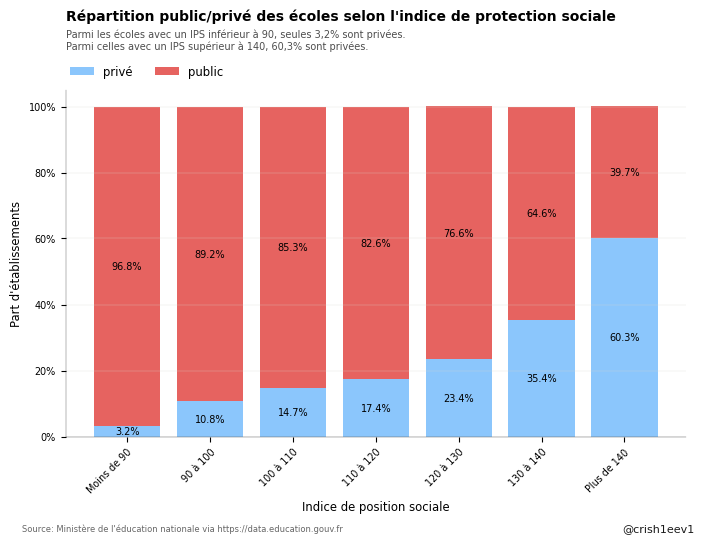

In [16]:
fig, ax = plt.subplots()
bar1 = ax.bar(ips_ecole_split.index, ips_ecole_split['prive'], label='privé', color='#8BC6FC')
bar2 = ax.bar(ips_ecole_split.index, ips_ecole_split['public'], label='public', bottom=ips_ecole_split['prive'], color='#E66360')

ax.set_title('Répartition public/privé des écoles selon l\'indice de protection sociale', pad=50)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132
ax.set_xlabel("Indice de position sociale")
ax.set_ylabel("Part d'établissements")

ax.set_xticklabels(
    labels=ips_ecole_split.index,
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")

label_bar1 = ((ips_ecole_split['prive']*100).round(2).astype(str)) + '%'
label_bar2 = ((ips_ecole_split['public']*100).round(2).astype(str)) + '%'
ax.bar_label(bar1, padding=0, label_type='center', labels=label_bar1, fontsize=7)
ax.bar_label(bar2, padding=0, label_type='center', labels=label_bar2, fontsize=7)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


# Subtitle
ax.text(x=.125, y=.97, 
        s="Parmi les écoles avec un IPS inférieur à 90, seules 3,2% sont privées.\nParmi celles avec un IPS supérieur à 140, 60,3% sont privées.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Source text
ax.text(x=.07, y=-0.1, 
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
ax.text(x=.82, y=-0.1, 
        s="@crish1eev1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.9)
    
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'ecole_repartition-prive-public-selon-ips_' + timestr + ".png"
plt.savefig(data_out + file_name)

Graph used in report (Elementary School)

In [17]:
fig, ax = plt.subplots()
bar1 = ax.bar(ips_ecole_split.index, ips_ecole_split['prive'], label='privé', color='#8BC6FC')
bar2 = ax.bar(ips_ecole_split.index, ips_ecole_split['public'], label='public', bottom=ips_ecole_split['prive'], color='#E66360')

#ax.set_title('Répartition public/privé des écoles selon l\'indice de protection sociale', pad=50)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132
ax.set_xlabel("Indice de position sociale")
ax.set_ylabel("Part d'établissements")

ax.set_xticklabels(
    labels=ips_ecole_split.index,
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")

label_bar1 = ((ips_ecole_split['prive']*100).round(2).astype(str)) + '%'
label_bar2 = ((ips_ecole_split['public']*100).round(2).astype(str)) + '%'
ax.bar_label(bar1, padding=0, label_type='center', labels=label_bar1, fontsize=7)
ax.bar_label(bar2, padding=0, label_type='center', labels=label_bar2, fontsize=7)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


# Subtitle
# ax.text(x=.125, y=.97, 
#         s="Parmi les écoles avec un IPS inférieur à 90, seules 3,2% sont privées.\nParmi celles avec un IPS supérieur à 140, 60,3% sont privées.", 
#         transform=fig.transFigure, 
#         ha='left', 
#         fontsize=7, 
#         alpha=.7)

# Source text
ax.text(x=.07, y=-0.1, 
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
ax.text(x=.82, y=-0.1, 
        s="@crish1eev1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.9)

# Save
file_name = 'ecole_repartition-prive-public-selon-ips_no-title' + ".png"
plt.savefig(graph_out + file_name)

# Avoid display with close method
plt.close(fig)

C:\Users\33671\AppData\Local\Temp\ipykernel_9316\2289854065.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



Graph with title and annotation (College)

C:\Users\33671\AppData\Local\Temp\ipykernel_9316\668300077.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



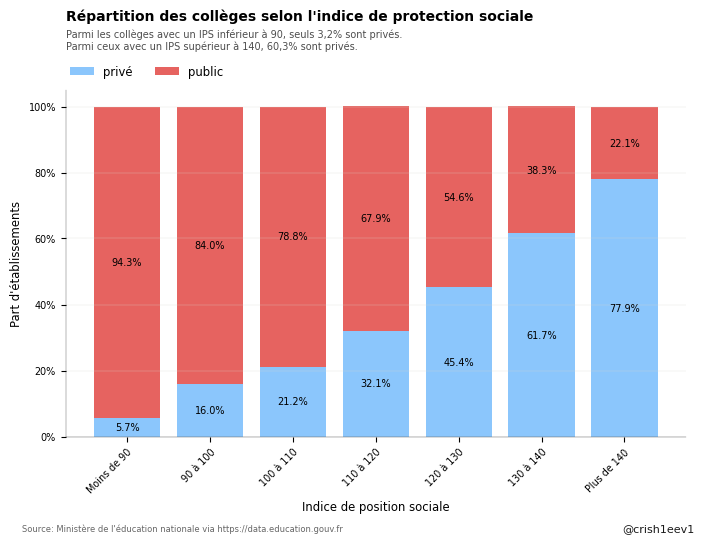

In [18]:
fig, ax = plt.subplots()
bar1 = ax.bar(ips_college_split.index, ips_college_split['prive'], label='privé', color='#8BC6FC')
bar2 = ax.bar(ips_college_split.index, ips_college_split['public'], label='public', bottom=ips_college_split['prive'], color='#E66360')

ax.set_title('Répartition des collèges selon l\'indice de protection sociale', pad=50)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132
ax.set_xlabel("Indice de position sociale")
ax.set_ylabel("Part d'établissements")

ax.set_xticklabels(
    labels=ips_college_split.index,
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")

label_bar1 = ((ips_college_split['prive']*100).round(2).astype(str)) + '%'
label_bar2 = ((ips_college_split['public']*100).round(2).astype(str)) + '%'
ax.bar_label(bar1, padding=0, label_type='center', labels=label_bar1, fontsize=7)
ax.bar_label(bar2, padding=0, label_type='center', labels=label_bar2, fontsize=7)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


# Subtitle
ax.text(x=.125, y=.97, 
        s="Parmi les collèges avec un IPS inférieur à 90, seuls 3,2% sont privés.\nParmi ceux avec un IPS supérieur à 140, 60,3% sont privés.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Source text
ax.text(x=.07, y=-0.1, 
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
ax.text(x=.82, y=-0.1, 
        s="@crish1eev1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.9)
    
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'ips-college' + timestr + ".png"
plt.savefig(data_out + file_name)

Graph used in report (College)

In [19]:
fig, ax = plt.subplots()
bar1 = ax.bar(ips_college_split.index, ips_college_split['prive'], label='privé', color='#8BC6FC')
bar2 = ax.bar(ips_college_split.index, ips_college_split['public'], label='public', bottom=ips_college_split['prive'], color='#E66360')

#ax.set_title('Répartition des collèges selon l\'indice de protection sociale', pad=50)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132
ax.set_xlabel("Indice de position sociale")
ax.set_ylabel("Part d'établissements")

ax.set_xticklabels(
    labels=ips_college_split.index,
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")

label_bar1 = ((ips_college_split['prive']*100).round(2).astype(str)) + '%'
label_bar2 = ((ips_college_split['public']*100).round(2).astype(str)) + '%'
ax.bar_label(bar1, padding=0, label_type='center', labels=label_bar1, fontsize=7)
ax.bar_label(bar2, padding=0, label_type='center', labels=label_bar2, fontsize=7)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


# Subtitle
# ax.text(x=.125, y=.97, 
#         s="Parmi les collèges avec un IPS inférieur à 90, seuls 3,2% sont privés.\nParmi ceux avec un IPS supérieur à 140, 60,3% sont privés.", 
#         transform=fig.transFigure, 
#         ha='left', 
#         fontsize=7, 
#         alpha=.7)

# Source text
ax.text(x=.07, y=-0.1, 
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
ax.text(x=.82, y=-0.1, 
        s="@crish1eev1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.9)
    
# Save
file_name = 'college_repartition-prive-public-selon-ips_no-title' + ".png"
plt.savefig(graph_out + file_name)

# Avoid display with close method
plt.close(fig)

C:\Users\33671\AppData\Local\Temp\ipykernel_9316\2030502295.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



### 7. IPS and Geolocation 

Ecoles

In [20]:
#https://plotly.com/python/reference/scattermapbox/

fig = px.scatter_mapbox(df[df["type_etablissement"] == 'ecole'], 
                     lat='latitude', lon='longitude', 
                     hover_name="nom_etablissment",
                     hover_data=['secteur', 'ips', 'type_etablissement'],
                     opacity  = 0.7,
                     center = {'lat': 46.5, 'lon': 2.6},
                     color = 'secteur',
                     color_discrete_sequence = ['#E66360', '#8BC6FC'],
                     zoom = 4.5,
                     mapbox_style = 'open-street-map',
                     width=800,
                     )

fig.update_traces(marker_size=3, selector=dict(type='scattermapbox'))

fig.update_layout(margin={"r":20, "t":20, "l":20, "b": 20})

file_name = 'geolocation-ecole-prive-public-selon-ips_no-title' + ".png"
fig.write_image(graph_out + file_name)

fig.show()

In [21]:
fig = px.scatter_mapbox(df[df["type_etablissement"] == 'ecole'], 
                     lat='latitude', lon='longitude', 
                     hover_name="nom_etablissment",
                     hover_data=['secteur', 'ips', 'type_etablissement'],
                     opacity  = 0.7,
                     center = {'lat': 46.5, 'lon': 2.6},
                     color = 'secteur',
                     color_discrete_sequence = ['#E66360', '#8BC6FC'],
                     zoom = 4.5,
                     mapbox_style = 'open-street-map',
                     #width=800,
                     )

fig.update_traces(marker_size=7, selector=dict(type='scattermapbox'))

fig.update_layout(margin={"r":20, "t":20, "l":20, "b": 20})

file_name = 'geolocation-ecole-prive-public-selon-ips_no-title' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)
plotly.offline.plot(fig, filename=html_graph_out + file_name)

'C:\\Users\\33671\\Documents\\my-website\\html5up-massively\\images\\graphs\\geolocation-ecole-prive-public-selon-ips_no-title.html'

Collèges

In [22]:
fig = px.scatter_mapbox(df[df["type_etablissement"] == 'college'], 
                     lat='latitude', lon='longitude', 
                     hover_name="nom_etablissment",
                     hover_data=['secteur', 'ips', 'dnb_taux_de_reussite_2021', 'type_etablissement'],
                     opacity  = 0.7,
                     center = {'lat': 46.5, 'lon': 2.6},
                     color = 'secteur',
                     color_discrete_sequence = ['#E66360', '#8BC6FC'],
                     zoom = 4.5,
                     mapbox_style = 'open-street-map',
                     width=800,
                     )

fig.update_traces(marker_size=5, selector=dict(type='scattermapbox'))

fig.update_layout(margin={"r":20, "t":20, "l":20, "b": 20})

file_name = 'geolocation-college-prive-public-selon-ips_no-title' + ".png"
fig.write_image(graph_out + file_name)

fig.show()

In [23]:
fig = px.scatter_mapbox(df[df["type_etablissement"] == 'college'], 
                     lat='latitude', lon='longitude', 
                     hover_name="nom_etablissment",
                     hover_data=['secteur', 'ips', 'dnb_taux_de_reussite_2021', 'type_etablissement'],
                     opacity  = 0.7,
                     center = {'lat': 46.5, 'lon': 2.6},
                     color = 'secteur',
                     color_discrete_sequence = ['#E66360', '#8BC6FC'],
                     zoom = 4.5,
                     mapbox_style = 'open-street-map',
                     #width=800,
                     )

fig.update_traces(marker_size=8, selector=dict(type='scattermapbox'))

fig.update_layout(margin={"r":20, "t":20, "l":20, "b": 20})


file_name = 'geolocation-college-prive-public-selon-ips_no-title' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)
plotly.offline.plot(fig, filename=html_graph_out + file_name)

'C:\\Users\\33671\\Documents\\my-website\\html5up-massively\\images\\graphs\\geolocation-college-prive-public-selon-ips_no-title.html'

Text(0.5, 0, '')

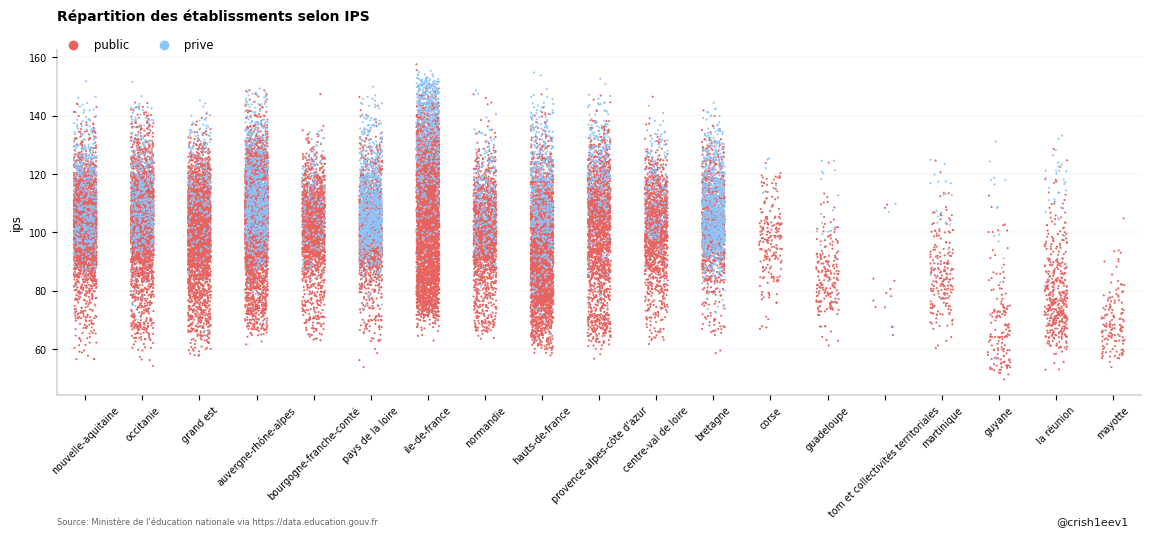

In [24]:
# Figure size
mpl.rcParams['figure.figsize'] = 14, 4.5  # Figure size in inches (default = 6.4, 4.8)
mpl.rcParams['figure.dpi'] = 100 # Figure dots per inch (default = 100)

#stripplot
sns.stripplot(x="region", y="ips", 
              data=df[df['region'].notnull()], 
              s=1.5, 
              #order=["prive", "public"], 
              jitter=0.2,
              hue='secteur',
              hue_order = ['public', 'prive'],
              palette=['#E66360', '#8BC6FC']).set(title='Répartition des établissments selon IPS')


plt.legend(bbox_to_anchor=(0, 0.98, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132

# Source text
plt.text(x=-0.5, y=0,
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
plt.text(x=17, y=0, 
        s="@crish1eev1", 
        ha='left', 
        fontsize=8, 
        alpha=.9)

# adjusting
plt.xticks(rotation=45)
plt.xlabel("")

### 8. IPS and Regions

Creating a dataframe with regional IPS means

In [25]:
# Empty dataframe
index = ['nouvelle-aquitaine', 'occitanie', 'grand est',
       'auvergne-rhône-alpes', 'bourgogne-franche-comté',
       'pays de la loire', 'ile-de-france', 'normandie',
       'hauts-de-france', "provence-alpes-côte d'azur",
       'centre-val de loire', 'bretagne', 'corse', 'guadeloupe',
       'tom et collectivités territoriales', 'martinique', 'guyane',
       'la réunion', 'mayotte']

columns = ['ecole_mean_public', 'ecole_mean_prive', 'delta_ecole', 'college_mean_public', 'college_mean_prive', 'delta_college']

df_ips_central_tendency = pd.DataFrame(data=None, index=index, columns=columns)

# Filling dataframe with regional means
for region in df['region'].unique():
    df_ips_central_tendency.loc[region, 'ecole_mean_public'] = df[(df['type_etablissement']=="ecole") & (df['secteur']=="public") & (df['region']==region)]['ips'].mean()
    df_ips_central_tendency.loc[region, 'ecole_mean_prive'] = df[(df['type_etablissement']=="ecole") & (df['secteur']=="prive") & (df['region']==region)]['ips'].mean()
    df_ips_central_tendency.loc[region, 'college_mean_public'] = df[(df['type_etablissement']=="college") & (df['secteur']=="public") & (df['region']==region)]['ips'].mean()
    df_ips_central_tendency.loc[region, 'college_mean_prive'] = df[(df['type_etablissement']=="college") & (df['secteur']=="prive") & (df['region']==region)]['ips'].mean()
    
# Filling delta columns
df_ips_central_tendency['delta_ecole'] = df_ips_central_tendency['ecole_mean_prive'] - df_ips_central_tendency['ecole_mean_public']
df_ips_central_tendency['delta_college'] = df_ips_central_tendency['college_mean_prive'] - df_ips_central_tendency['college_mean_public']

# Removing last row
df_ips_central_tendency = df_ips_central_tendency.head(-1)

# Converting to floats
df_ips_central_tendency = df_ips_central_tendency.convert_dtypes()

# Rounding
df_ips_central_tendency = df_ips_central_tendency.round(decimals=2)


df_ips_central_tendency.fillna(0, inplace=True)

df_ips_central_tendency.sort_values(by='delta_ecole', ascending=False, inplace=True)

df_ips_central_tendency


ecole_mean_public  ecole_mean_prive  \
guyane                                          69.31            101.23   
la réunion                                      78.69             110.5   
tom et collectivités territoriales              79.48            108.35   
ile-de-france                                  106.77            134.58   
martinique                                      85.89            109.95   
corse                                            97.3             121.1   
guadeloupe                                      84.86            107.97   
provence-alpes-côte d'azur                     101.53            120.56   
hauts-de-france                                  94.4            112.02   
grand est                                      100.29            114.54   
centre-val de loire                             101.1             114.1   
normandie                                       99.72            108.75   
bourgogne-franche-comté                         101.2             110.0   
nouvelle-aquitaine                             102.14            110.77   
occitanie                                       103.2            110.99   
auvergne-rhône-alpes                           105.42            112.37   
pays de la loire                               101.21            107.85   
bretagne                                       103.05            107.07   
mayotte                                         69.57               0.0   

                                    delta_ecole  college_mean_public  \
guyane                                    31.92                67.03   
la réunion                                31.81                81.07   
tom et collectivités territoriales        28.87                83.32   
ile-de-france                              27.8               104.85   
martinique                                24.07                86.69   
corse                                      23.8                98.96   
guadeloupe                                23.11                87.46   
provence-alpes-côte d'azur                19.02                 99.1   
hauts-de-france                           17.62                91.52   
grand est                                 14.24                97.62   
centre-val de loire                        13.0                99.78   
normandie                                  9.03                 97.8   
bourgogne-franche-comté                    8.81               100.56   
nouvelle-aquitaine                         8.63               102.67   
occitanie                                  7.79               102.75   
auvergne-rhône-alpes                       6.95               103.62   
pays de la loire                           6.64               102.16   
bretagne                                   4.02                104.3   
mayotte                                     0.0                69.81   

                                    college_mean_prive  delta_college  
guyane                                          107.67          40.63  
la réunion                                      119.28          38.21  
tom et collectivités territoriales                 0.0            0.0  
ile-de-france                                    131.0          26.14  
martinique                                      110.63          23.94  
corse                                            119.3          20.34  
guadeloupe                                      105.97           18.5  
provence-alpes-côte d'azur                       118.2           19.1  
hauts-de-france                                 110.12           18.6  
grand est                                       113.05          15.42  
centre-val de loire                             113.17          13.39  
normandie                                       109.63          11.83  
bourgogne-franche-comté                         106.43           5.87  
nouvelle-aquitaine                              110.94           8.27  
occitanie     

In [26]:
df_ips_central_tendency.index

Index(['guyane', 'la réunion', 'tom et collectivités territoriales',
       'ile-de-france', 'martinique', 'corse', 'guadeloupe',
       'provence-alpes-côte d'azur', 'hauts-de-france', 'grand est',
       'centre-val de loire', 'normandie', 'bourgogne-franche-comté',
       'nouvelle-aquitaine', 'occitanie', 'auvergne-rhône-alpes',
       'pays de la loire', 'bretagne', 'mayotte'],
      dtype='object')

In [27]:
print(tabulate(df_ips_central_tendency[['ecole_mean_public', 'ecole_mean_prive', 'delta_ecole']], headers=['','moyenne IPS privé', 'moyenne IPS public', 'différence'], tablefmt="github"))

|                                    |   moyenne IPS privé |   moyenne IPS public |   différence |
|------------------------------------|---------------------|----------------------|--------------|
| guyane                             |               69.31 |               101.23 |        31.92 |
| la réunion                         |               78.69 |               110.5  |        31.81 |
| tom et collectivités territoriales |               79.48 |               108.35 |        28.87 |
| ile-de-france                      |              106.77 |               134.58 |        27.8  |
| martinique                         |               85.89 |               109.95 |        24.07 |
| corse                              |               97.3  |               121.1  |        23.8  |
| guadeloupe                         |               84.86 |               107.97 |        23.11 |
| provence-alpes-côte d'azur         |              101.53 |               120.56 |        19.02 |
| hauts-de

In [28]:
fig = px.box(df[(df['region'].notnull()) & (df['type_etablissement']=="ecole")], 
             y = 'ips', x = 'region', 
             category_orders={'region': ['guyane', 'la réunion', 'tom et collectivités territoriales',
       'ile-de-france', 'martinique', 'corse', 'guadeloupe',
       'provence-alpes-côte d\'azur', 'hauts-de-france', 'grand est',
       'centre-val de loire', 'normandie', 'bourgogne-franche-comté',
       'nouvelle-aquitaine', 'occitanie', 'auvergne-rhône-alpes',
       'pays de la loire', 'bretagne', 'mayotte']},
             color = 'secteur', 
             boxmode = 'overlay', 
             color_discrete_map = {'public': '#E66360', 'prive': '#8BC6FC'}, 
             points=False, 
             width=1300, 
             height=450
             )

fig.update_layout(xaxis={'title': "", 'visible': True, 'showticklabels': True},
                  yaxis_title="Indice de position sociale",
                  #margin={'t': 40, 'b': 0},
                  legend=dict(orientation="h", yanchor="bottom",y=1.01, xanchor="left")
                          )


# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE     https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80
fig.add_annotation(
    text = (f"Source: Ministère de l'éducation nationale via https://data.education.gouv.fr")
    , showarrow=False
    , x = -0.05
    , y = -0.5
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)

fig.add_annotation(
    text = (f"@crish1eev1")
    , showarrow=False
    , x = 0.95
    , y = -0.5
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)

file_name = 'boxplot-ecole-ips-selon-region_no-title' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)
plotly.offline.plot(fig, filename=html_graph_out + file_name)
file_name = 'boxplot-ecole-ips-selon-region_no-title' + ".png"
fig.write_image(graph_out + file_name)

fig.show()

In [29]:
df_ips_central_tendency.sort_values(by='delta_college', ascending=False, inplace=True)

In [30]:
df_ips_central_tendency.index

Index(['guyane', 'la réunion', 'ile-de-france', 'martinique', 'corse',
       'provence-alpes-côte d'azur', 'hauts-de-france', 'guadeloupe',
       'grand est', 'centre-val de loire', 'normandie', 'auvergne-rhône-alpes',
       'pays de la loire', 'occitanie', 'nouvelle-aquitaine',
       'bourgogne-franche-comté', 'bretagne',
       'tom et collectivités territoriales', 'mayotte'],
      dtype='object')

In [31]:
print(tabulate(df_ips_central_tendency[['college_mean_public', 'college_mean_prive', 'delta_college']], headers=['','moyenne IPS privé', 'moyenne IPS public', 'différence'], tablefmt="github"))

|                                    |   moyenne IPS privé |   moyenne IPS public |   différence |
|------------------------------------|---------------------|----------------------|--------------|
| guyane                             |               67.03 |               107.67 |        40.63 |
| la réunion                         |               81.07 |               119.28 |        38.21 |
| ile-de-france                      |              104.85 |               131    |        26.14 |
| martinique                         |               86.69 |               110.63 |        23.94 |
| corse                              |               98.96 |               119.3  |        20.34 |
| provence-alpes-côte d'azur         |               99.1  |               118.2  |        19.1  |
| hauts-de-france                    |               91.52 |               110.12 |        18.6  |
| guadeloupe                         |               87.46 |               105.97 |        18.5  |
| grand es

In [32]:
fig = px.box(df[(df['region'].notnull()) & (df['type_etablissement']=="college")], 
             y = 'ips', x = 'region', 
             category_orders={'region': ['guyane', 'la réunion', 'ile-de-france', 'martinique', 'corse',
       'provence-alpes-côte d\'azur', 'hauts-de-france', 'guadeloupe',
       'grand est', 'centre-val de loire', 'normandie', 'auvergne-rhône-alpes',
       'pays de la loire', 'occitanie', 'nouvelle-aquitaine',
       'bourgogne-franche-comté', 'bretagne',
       'tom et collectivités territoriales', 'mayotte']},
             color = 'secteur', 
             boxmode = 'overlay', 
             color_discrete_map = {'public': '#E66360', 'prive': '#8BC6FC'}, 
             points=False, 
             width=1300, 
             height=450
             )

fig.update_layout(xaxis={'title': "", 'visible': True, 'showticklabels': True},
                  yaxis_title="Indice de position sociale",
                  #margin={'t': 40, 'b': 0},
                  legend=dict(orientation="h", yanchor="bottom",y=1.01, xanchor="left")
                          )


# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE     https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80
fig.add_annotation(
    text = (f"Source: Ministère de l'éducation nationale via https://data.education.gouv.fr")
    , showarrow=False
    , x = -0.05
    , y = -0.5
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=8, color="grey")
    , align="left"
    ,)

fig.add_annotation(
    text = (f"@crish1eev1")
    , showarrow=False
    , x = 0.95
    , y = -0.5
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)

file_name = 'boxplot-college-ips-selon-region_no-title' + ".html"
plotly.offline.plot(fig, filename=graph_out + file_name)
plotly.offline.plot(fig, filename=html_graph_out + file_name)
file_name = 'boxplot-college-ips-selon-region_no-title' + ".png"
fig.write_image(graph_out + file_name)

fig.show()

## 4. Data Analysis and visualization (Revenus par commune)

#### 4.1 Tentative Niveau de vie

Le niveau de vie fait référence à la quantité de biens et services qu’un individu, un ménage ou une
population peut s’acheter avec le revenu dont il dispose. L’Insee définit le niveau de vie d’un ménage
comme le revenu disponible d'un ménage divisé par un coefficient, dénommé nombre d’unités de
consommation, qui dépend de la taille du ménage.
Diviser le revenu disponible par un nombre d'unités de consommation permet ainsi de comparer le
revenu des ménages de tailles différentes. En effet, un célibataire ayant un revenu de 1 500 € par
mois a un niveau de vie plus élevé qu'une famille nombreuse disposant du même revenu mensuel.


<AxesSubplot: xlabel='niveau_de_vie_commune', ylabel='ips'>

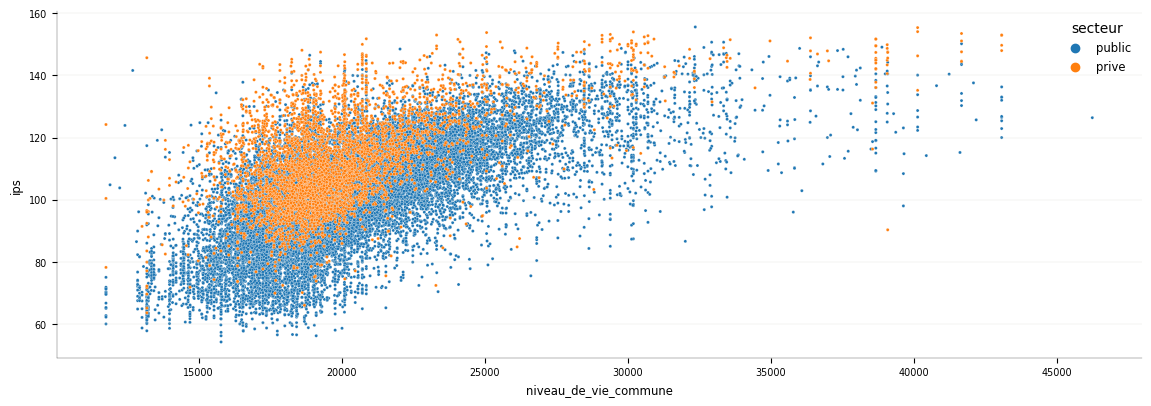

In [33]:
sns.scatterplot(data=df[df['type_etablissement']=="ecole"], x="niveau_de_vie_commune", y="ips", hue="secteur", s=5, )

## 5. Data Analysis & Visualization ("Brevet" success rate)

#### 4.1 ???

In [34]:
fig = px.violin(df[df['dnb_taux_de_reussite_2021'] >= 40], 
                y='dnb_taux_de_reussite_2021', 
                color='secteur', 
                box=True, 
                points=False
                )

fig.update_layout(violinmode='group', 
                  width=600, height=400,
                  title="Répartition des collèges selon le taux de reussite au brevet",
                  xaxis_title="",
                  yaxis_title="Taux de réussite au brevet",
                  margin=dict(l=90, r=50, b=50, t=70, pad=4),
                  legend=dict(orientation="h", yanchor="bottom",y=1.01, xanchor="left")
                          )

fig.show()

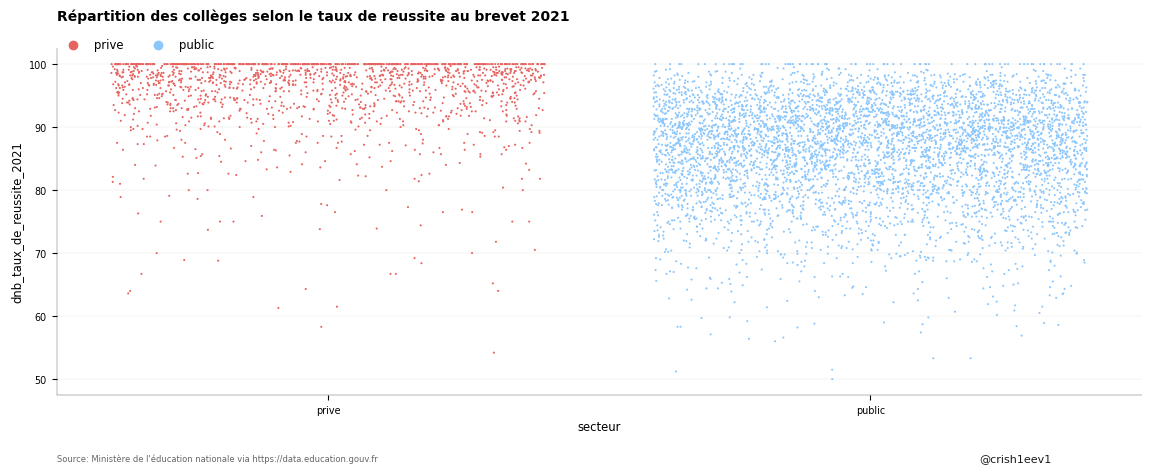

In [35]:
#stripplot
sns.stripplot(x="secteur", y="dnb_taux_de_reussite_2021", 
              data=df[df['dnb_taux_de_reussite_2021'] >= 50], 
              s=1.5, 
              order=["prive", "public"], 
              jitter=0.4,
              hue='secteur',
              hue_order = ['prive', 'public'],
              palette=['#E66360', '#8BC6FC']).set(title='Répartition des collèges selon le taux de reussite au brevet 2021')

plt.legend(bbox_to_anchor=(0, 0.98, 1, 0.2), loc="lower left", ncol=2, borderaxespad=0) #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132

# Source text
plt.text(x=-0.5, y=37,
        s="Source: Ministère de l'éducation nationale via https://data.education.gouv.fr", 
        ha='left', 
        fontsize=6, 
        alpha=.6)

# copyright text
plt.text(x=1.2, y=37, 
        s="@crish1eev1", 
        ha='left', 
        fontsize=8, 
        alpha=.9)


timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'dnd_stripplot' + timestr + ".png"
plt.savefig(data_out + file_name)



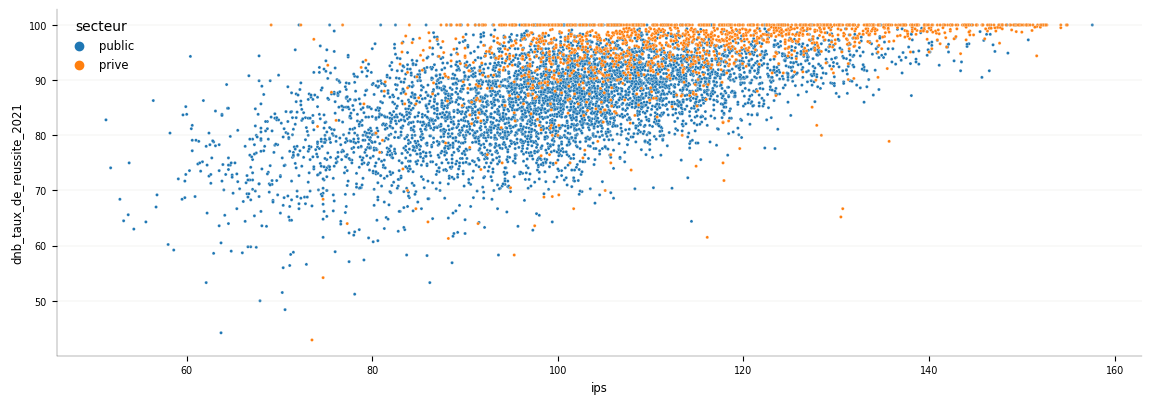

In [36]:
sns.scatterplot(data=df[df['dnb_taux_de_reussite_2021'] >= 40], x="ips", y="dnb_taux_de_reussite_2021", hue="secteur", s=5, )

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'dnd-ips-scatterplot_' + timestr + ".png"
plt.savefig(data_out + file_name)

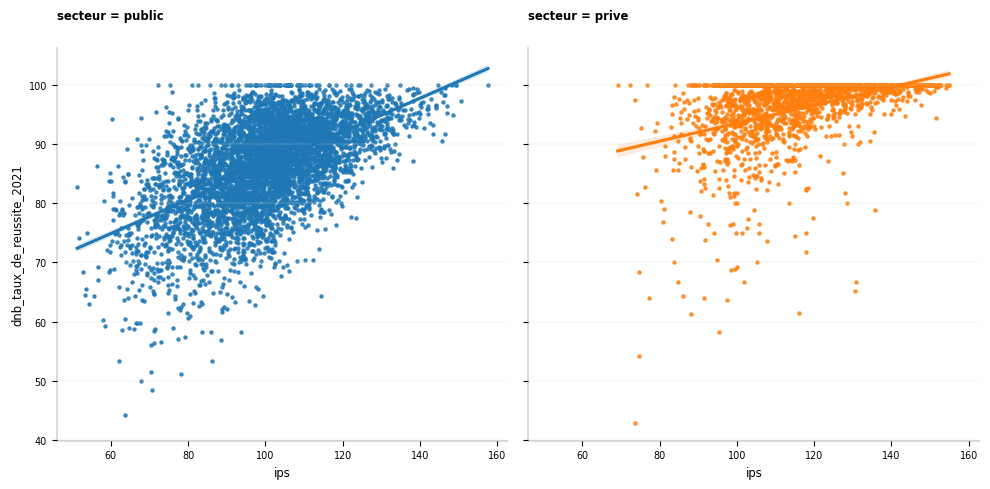

In [37]:
sns.lmplot(x = "ips", y = "dnb_taux_de_reussite_2021",
           col = "secteur", hue = "secteur",
           data = df[df['dnb_taux_de_reussite_2021'] >= 40],
           scatter_kws={"s": 5})

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = 'dnd-ips-lmplot_' + timestr + ".png"
plt.savefig(data_out + file_name)

## 6. Data Analysis & Visualization ("Brevet" success rate)

- Faire varier la taille des dots par le nombre d'élèves
- Liste des établissements IPS les plus élevés & moins elevés (géo et liste) 
- Faire proprement l'export des .html vers mon site ainsi que l'inclusion dans les rapports


In [38]:
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 45.5947699546814
